In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [2]:
df = pd.read_csv('velib-disponibilite-en-temps-reel.csv',sep=";")


In [3]:
df.shape

(1471, 15)

In [4]:
df.dtypes

Identifiant station                object
Nom station                        object
Station en fonctionnement          object
Capacité de la station              int64
Nombre bornettes libres             int64
Nombre total vélos disponibles      int64
Vélos mécaniques disponibles        int64
Vélos électriques disponibles       int64
Borne de paiement disponible       object
Retour vélib possible              object
Actualisation de la donnée         object
Coordonnées géographiques          object
Nom communes équipées              object
Code INSEE communes équipées        int64
station_opening_hours             float64
dtype: object

In [5]:
df = df.drop(columns=['station_opening_hours'])


In [6]:
df["Capacité de la station"] = df["Nombre bornettes libres"] + df["Nombre total vélos disponibles"]
df

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,40001,Hôpital Mondor,OUI,28,12,16,12,4,OUI,OUI,2025-03-10T14:53:07+00:00,"48.798922410229, 2.4537451531298",Créteil,94028
1,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,1,0,OUI,OUI,2025-03-10T14:51:09+00:00,"48.865983, 2.275725",Paris,75056
2,9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,2025-03-10T14:51:42+00:00,"48.87929591733507, 2.3373600840568547",Paris,75056
3,44015,Rouget de L'isle - Watteau,OUI,20,8,12,3,9,OUI,OUI,2025-03-10T14:49:27+00:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,94081
4,11104,Charonne - Robert et Sonia Delaunay,OUI,19,18,1,0,1,OUI,OUI,2025-03-10T14:48:45+00:00,"48.855907555969, 2.3925706744194",Paris,75056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,12127,Tremblay - Lac des Minimes,OUI,47,20,27,8,19,OUI,OUI,2025-03-10T14:50:57+00:00,"48.834131261494, 2.4547516554594",Paris,75056
1467,8004,Malesherbes - Place de la Madeleine,OUI,74,13,61,46,15,OUI,OUI,2025-03-10T14:53:10+00:00,"48.870406028483, 2.323243509808",Paris,75056
1468,9104,Caumartin - Provence,OUI,22,11,11,2,9,OUI,OUI,2025-03-10T14:50:54+00:00,"48.874422773426545, 2.3284685611724854",Paris,75056
1469,4005,Quai des Célestins - Henri IV,OUI,0,0,0,0,0,NON,NON,2025-01-14T08:37:45+00:00,"48.8512971, 2.3624535",Paris,75056


In [7]:
df = df[df["Station en fonctionnement"] != "NON"]
df = df[df["Capacité de la station"] != 0]

In [8]:
df.count()

Identifiant station               1446
Nom station                       1446
Station en fonctionnement         1446
Capacité de la station            1446
Nombre bornettes libres           1446
Nombre total vélos disponibles    1446
Vélos mécaniques disponibles      1446
Vélos électriques disponibles     1446
Borne de paiement disponible      1446
Retour vélib possible             1446
Actualisation de la donnée        1446
Coordonnées géographiques         1446
Nom communes équipées             1446
Code INSEE communes équipées      1446
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1470
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Identifiant station             1446 non-null   object
 1   Nom station                     1446 non-null   object
 2   Station en fonctionnement       1446 non-null   object
 3   Capacité de la station          1446 non-null   int64 
 4   Nombre bornettes libres         1446 non-null   int64 
 5   Nombre total vélos disponibles  1446 non-null   int64 
 6   Vélos mécaniques disponibles    1446 non-null   int64 
 7   Vélos électriques disponibles   1446 non-null   int64 
 8   Borne de paiement disponible    1446 non-null   object
 9   Retour vélib possible           1446 non-null   object
 10  Actualisation de la donnée      1446 non-null   object
 11  Coordonnées géographiques       1446 non-null   object
 12  Nom communes équipées           1446 non-null   objec

In [10]:
df.describe()

,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Code INSEE communes équipées
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,30.845090,18.946750,11.898340,7.631397,4.266943,80980.621715
std,11.597795,12.261423,11.722868,9.940534,4.295726,8410.203677
min,8.000000,0.000000,0.000000,0.000000,0.000000,75056.000000
25%,22.000000,9.000000,3.000000,1.000000,1.000000,75056.000000
50%,28.000000,18.000000,8.000000,3.000000,3.000000,75056.000000
75%,36.000000,26.000000,18.000000,12.000000,6.000000,92040.000000
max,74.000000,65.000000,68.000000,65.000000,35.000000,95018.000000


In [11]:
df.dropna(inplace=True)

In [12]:
print(df.isna().sum())  # Or df.isnull().sum() : it count the number of missing values per column

Identifiant station               0
Nom station                       0
Station en fonctionnement         0
Capacité de la station            0
Nombre bornettes libres           0
Nombre total vélos disponibles    0
Vélos mécaniques disponibles      0
Vélos électriques disponibles     0
Borne de paiement disponible      0
Retour vélib possible             0
Actualisation de la donnée        0
Coordonnées géographiques         0
Nom communes équipées             0
Code INSEE communes équipées      0
dtype: int64


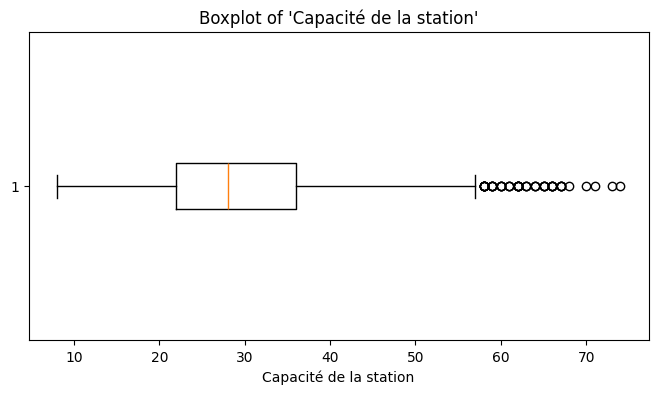

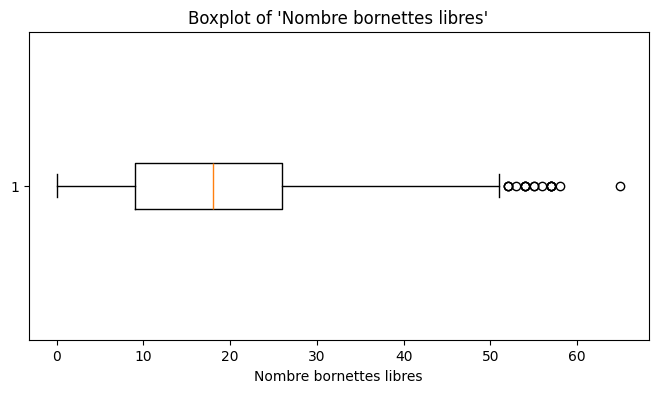

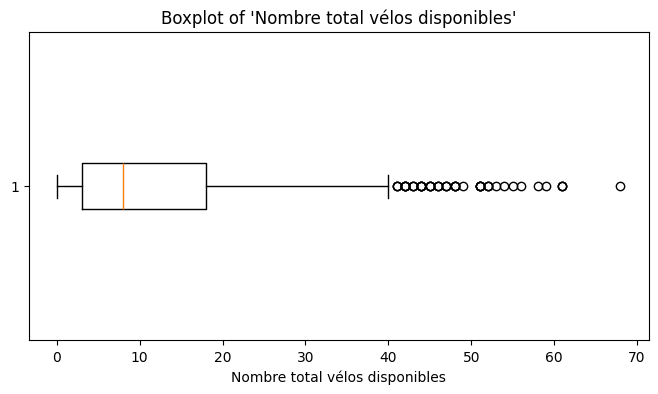

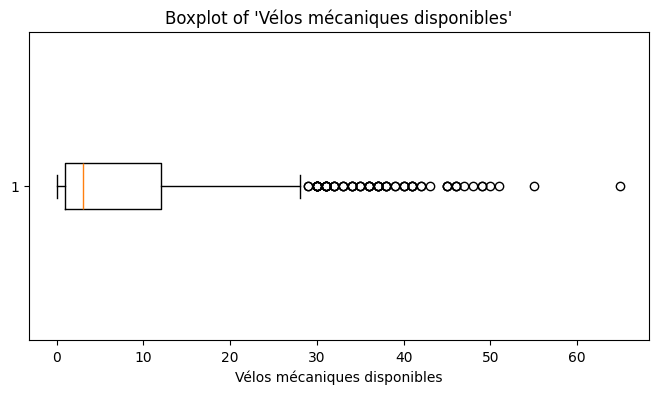

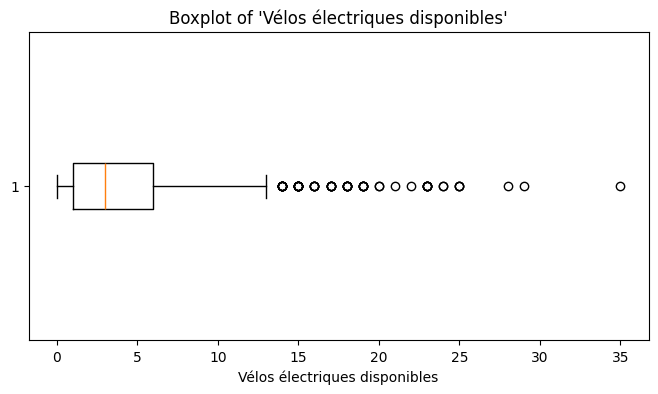

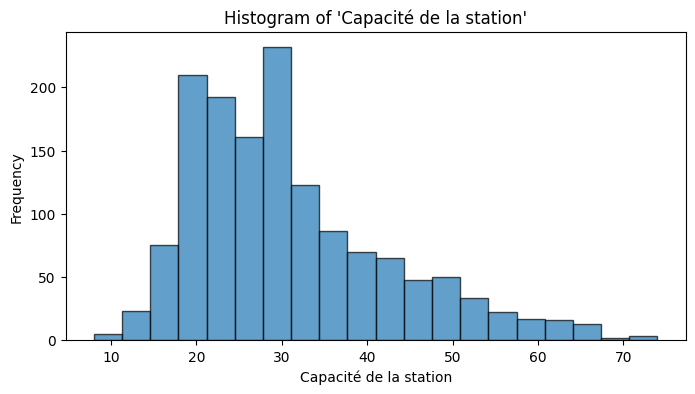

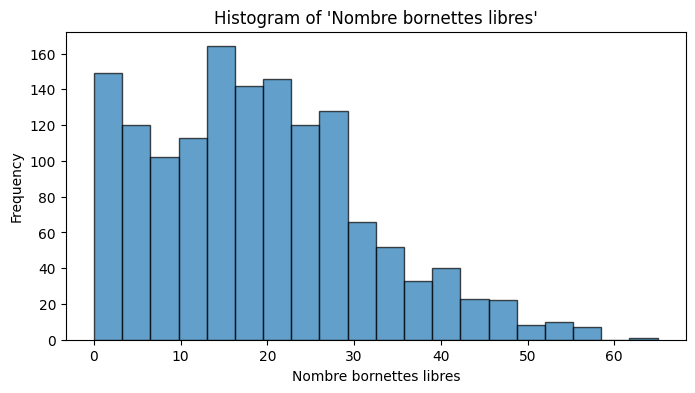

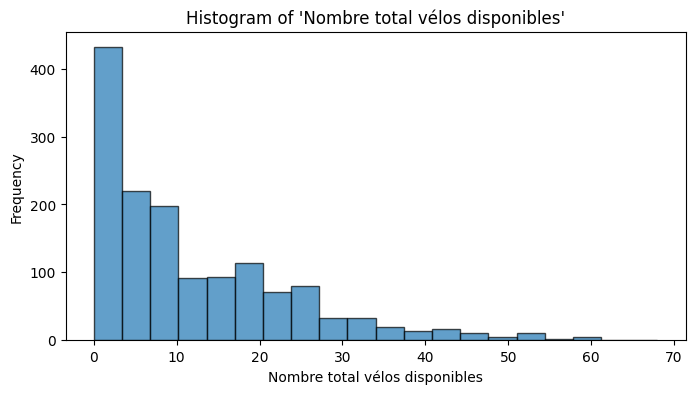

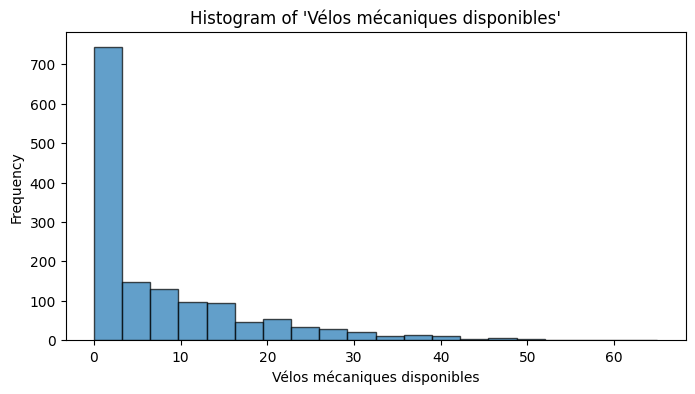

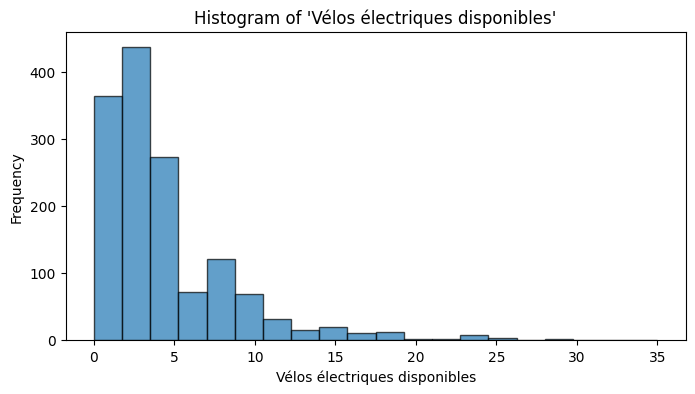

In [13]:
numerical_columns = ["Capacité de la station", "Nombre bornettes libres", 
                     "Nombre total vélos disponibles", "Vélos mécaniques disponibles", 
                     "Vélos électriques disponibles"]

# Générer les boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of '{col}'")
    plt.xlabel(col)
    plt.show()

# Générer les histogrammes
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=20, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

I Think that we finished the cleaning of our dataset. There are no NaN or incoherent values, the columns names are understandable and evely columns have the same amount of datas with no missing values

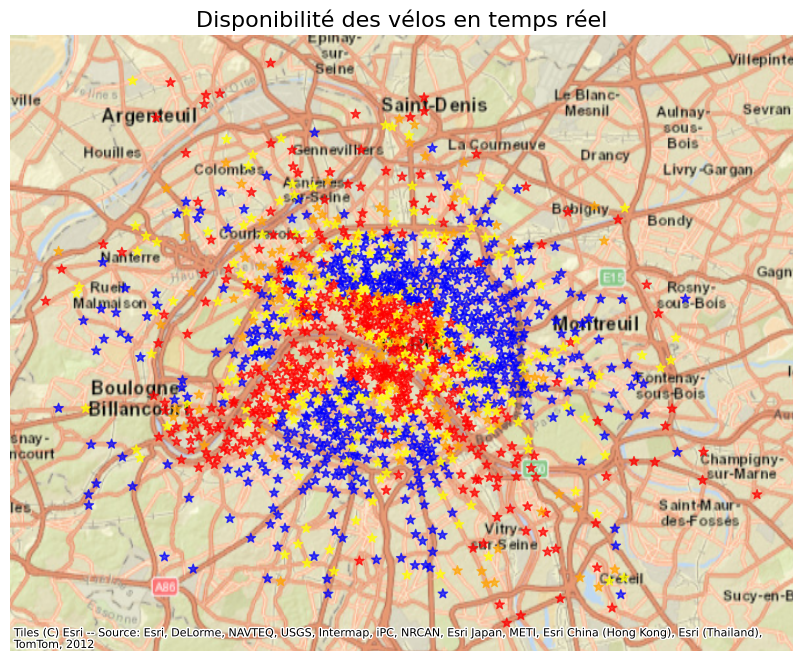

In [14]:
df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Définition des couleurs selon le nombre de vélos disponibles
df['color'] = df['Nombre total vélos disponibles'].apply(lambda x: 'red' if x > 15 else 'orange' if x > 10 else 'yellow' if x > 5 else 'blue')

# Création du GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Création de la figure
fig, ax = plt.subplots(figsize=(12, 8))

# Affichage des stations Vélib' avec couleur selon vélos disponibles
gdf.plot(ax=ax, marker='*', color=gdf['color'], markersize=50, alpha=0.7)

# Ajout du fond de carte
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldStreetMap)

# Ajustements
ax.set_title("Disponibilité des vélos en temps réel", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_axis_off()

plt.show()

In [1]:
print("hello world")

hello world
